<a href="https://colab.research.google.com/github/Balaji-2404/Electrical-Smart-Grid/blob/main/LSTM_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Session_data.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Convert Arrival and Departure to datetime
data['Arrival'] = pd.to_datetime(data['Arrival'], format='%d-%m-%Y %H:%M')
data['Departure'] = pd.to_datetime(data['Departure'], format='%d-%m-%Y %H:%M')

# Calculate stay duration in minutes (if not provided correctly)
data['Stay (min)'] = (data['Departure'] - data['Arrival']).dt.total_seconds() / 60

# Calculate SOC difference
data['SOC_difference'] = data['SOC departure'] - data['SOC arrival']

# Extract time-based features
data['Arrival_hour'] = data['Arrival'].dt.hour
data['Arrival_day'] = data['Arrival'].dt.dayofweek
data['Arrival_month'] = data['Arrival'].dt.month

# Calculate charge efficiency
data['Charge_efficiency'] = data['Energy (Wh)'] / data['Stay (min)']

# Check for missing values
missing_values = data.isnull().sum()

# Display the missing values
print(missing_values)

# Display the first few rows of the dataframe to check the results
print(data.head())


Session                                 0
CCS                                     0
Arrival                                 0
Departure                               0
Stay (min)                              0
Energy (Wh)                             0
Pmax (W)                                0
Preq_max (W)                            0
Controlled session (0=False, 1=True)    0
TotalCapacity                           0
BulkCapacity                            0
SOC arrival                             0
SOC departure                           0
Energy capacity (Wh)                    0
SOC_difference                          0
Arrival_hour                            0
Arrival_day                             0
Arrival_month                           0
Charge_efficiency                       0
dtype: int64
   Session   CCS             Arrival           Departure  Stay (min)  \
0      278  CCS1 2022-08-11 23:33:00 2022-08-11 23:37:00         4.0   
1      897  CCS1 2023-04-22 09:46:00 2023-04-

In [ ]:
# Save the cleaned data to a new Excel file
cleaned_file_path = 'cleaned_ev_station_data.xlsx'
data.to_excel(cleaned_file_path, index=False)


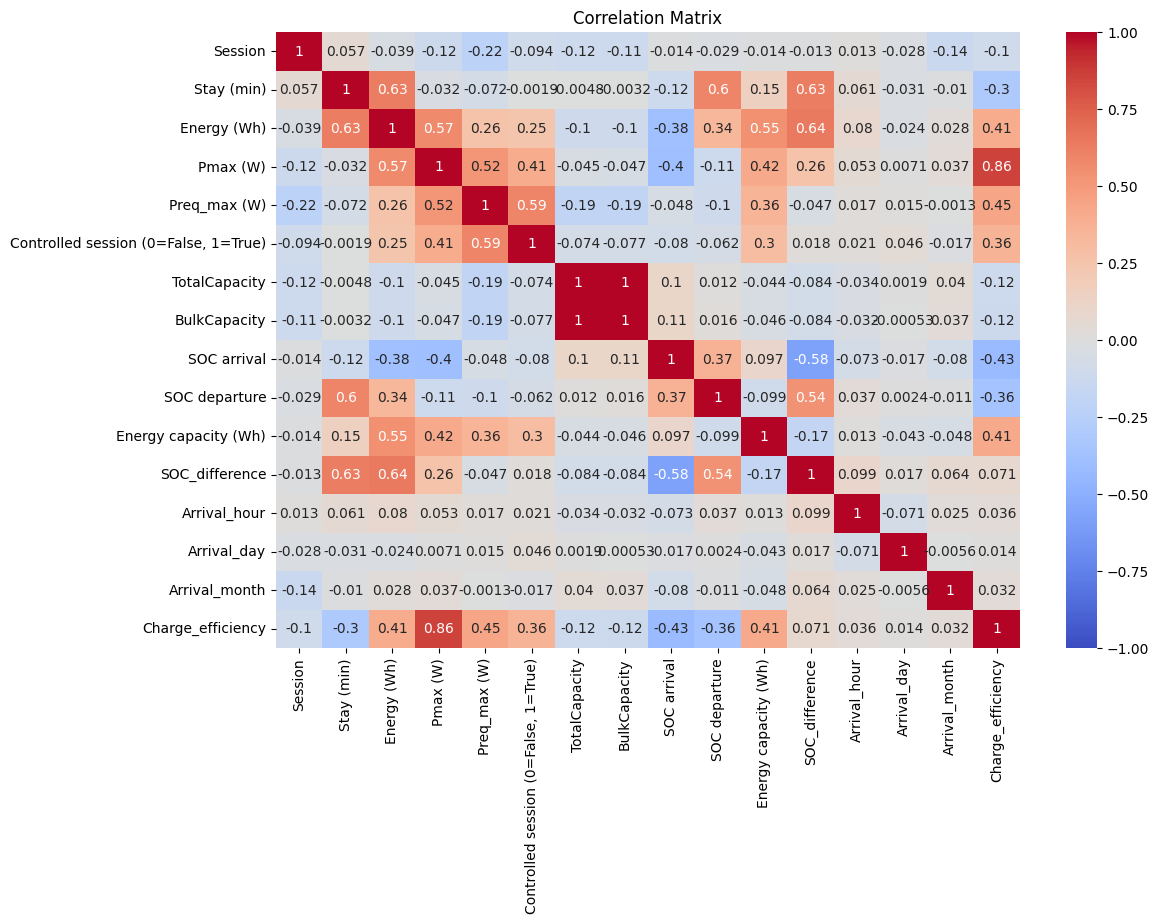

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/Session_data.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Convert Arrival and Departure to datetime
data['Arrival'] = pd.to_datetime(data['Arrival'], format='%d-%m-%Y %H:%M')
data['Departure'] = pd.to_datetime(data['Departure'], format='%d-%m-%Y %H:%M')

# Calculate stay duration in minutes (if not provided correctly)
data['Stay (min)'] = (data['Departure'] - data['Arrival']).dt.total_seconds() / 60

# Calculate SOC difference
data['SOC_difference'] = data['SOC departure'] - data['SOC arrival']

# Extract time-based features
data['Arrival_hour'] = data['Arrival'].dt.hour
data['Arrival_day'] = data['Arrival'].dt.dayofweek
data['Arrival_month'] = data['Arrival'].dt.month

# Calculate charge efficiency
data['Charge_efficiency'] = data['Energy (Wh)'] / data['Stay (min)']

# Exclude non-numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Save the cleaned data to a new Excel file
cleaned_file_path = 'cleaned_ev_station_data.xlsx'
data.to_excel(cleaned_file_path, index=False)


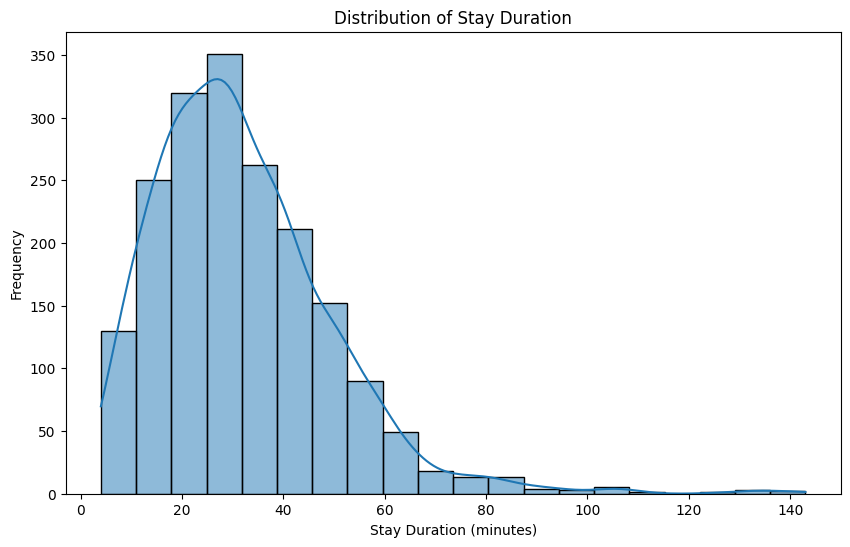

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Stay (min)
plt.figure(figsize=(10, 6))
sns.histplot(data['Stay (min)'], bins=20, kde=True)
plt.title('Distribution of Stay Duration')
plt.xlabel('Stay Duration (minutes)')
plt.ylabel('Frequency')
plt.show()


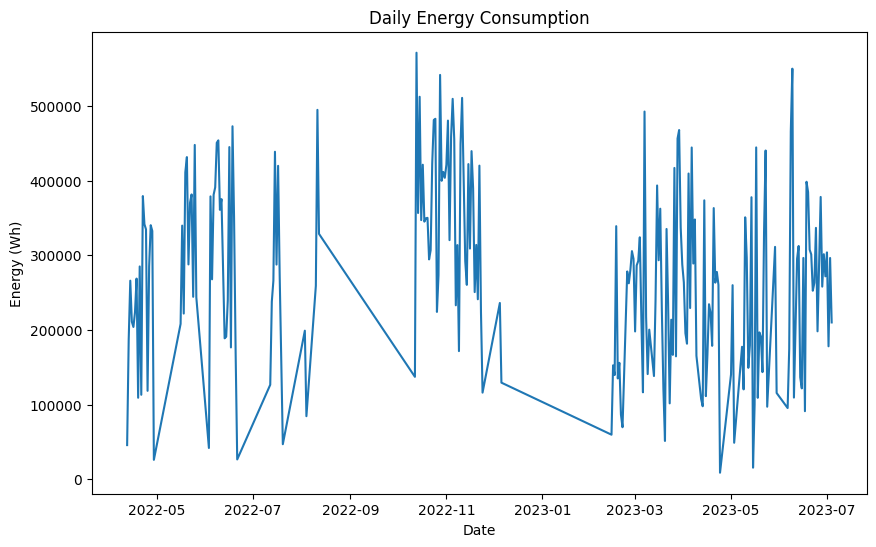

In [ ]:
plt.figure(figsize=(10, 6))
data['Arrival_date'] = data['Arrival'].dt.date
daily_energy = data.groupby('Arrival_date')['Energy (Wh)'].sum()
daily_energy.plot(kind='line')
plt.title('Daily Energy Consumption')
plt.xlabel('Date')
plt.ylabel('Energy (Wh)')
plt.show()


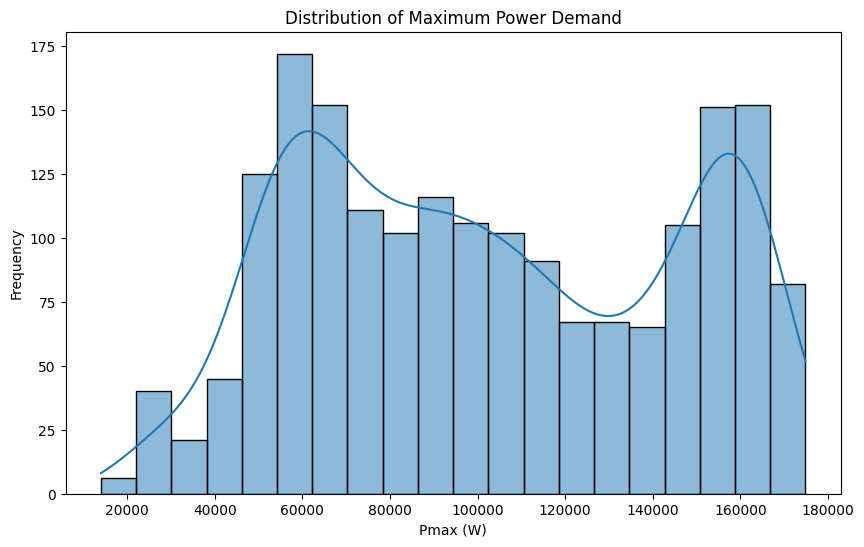

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Pmax (W)'], bins=20, kde=True)
plt.title('Distribution of Maximum Power Demand')
plt.xlabel('Pmax (W)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Define features and target
features = ['Stay (min)', 'Pmax (W)', 'Preq_max (W)', 'SOC arrival', 'SOC departure', 'TotalCapacity', 'BulkCapacity', 'Arrival_hour', 'Arrival_day', 'Arrival_month']
target = 'Energy (Wh)'

# Split data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')


Root Mean Squared Error: 9158.574615931926


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


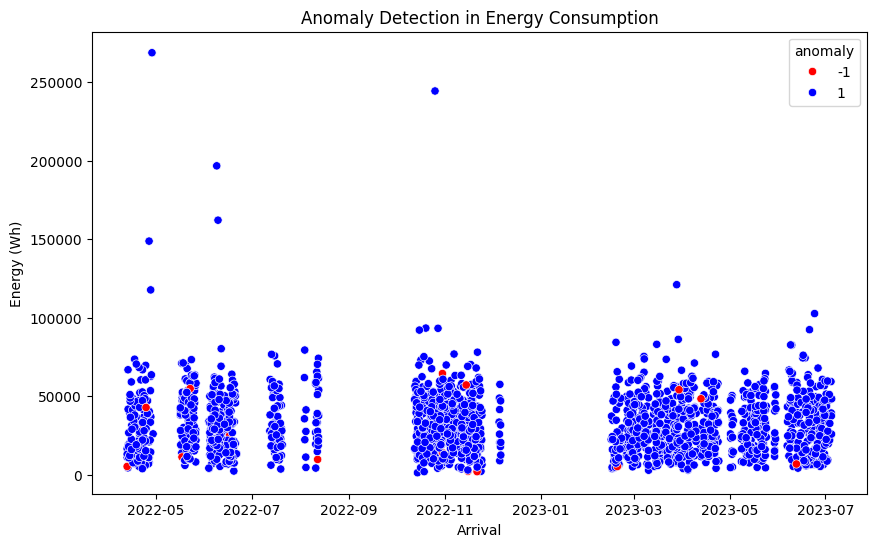

In [ ]:
from sklearn.ensemble import IsolationForest

# Train an isolation forest model for anomaly detection
isolation_forest = IsolationForest(contamination=0.01)
data['anomaly'] = isolation_forest.fit_predict(data[features])

# Visualize the anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Arrival', y='Energy (Wh)', hue='anomaly', data=data, palette={1: 'blue', -1: 'red'})
plt.title('Anomaly Detection in Energy Consumption')
plt.show()


Root Mean Squared Error: 5792.261394275514


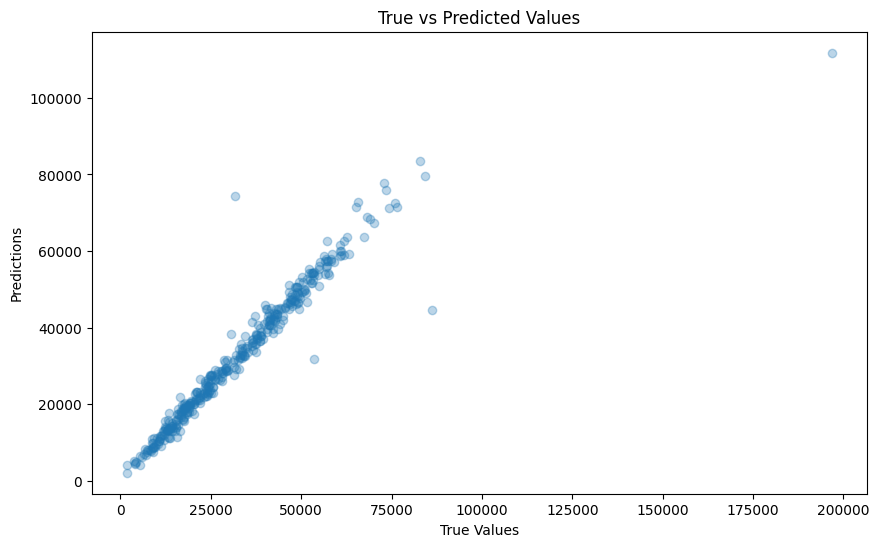

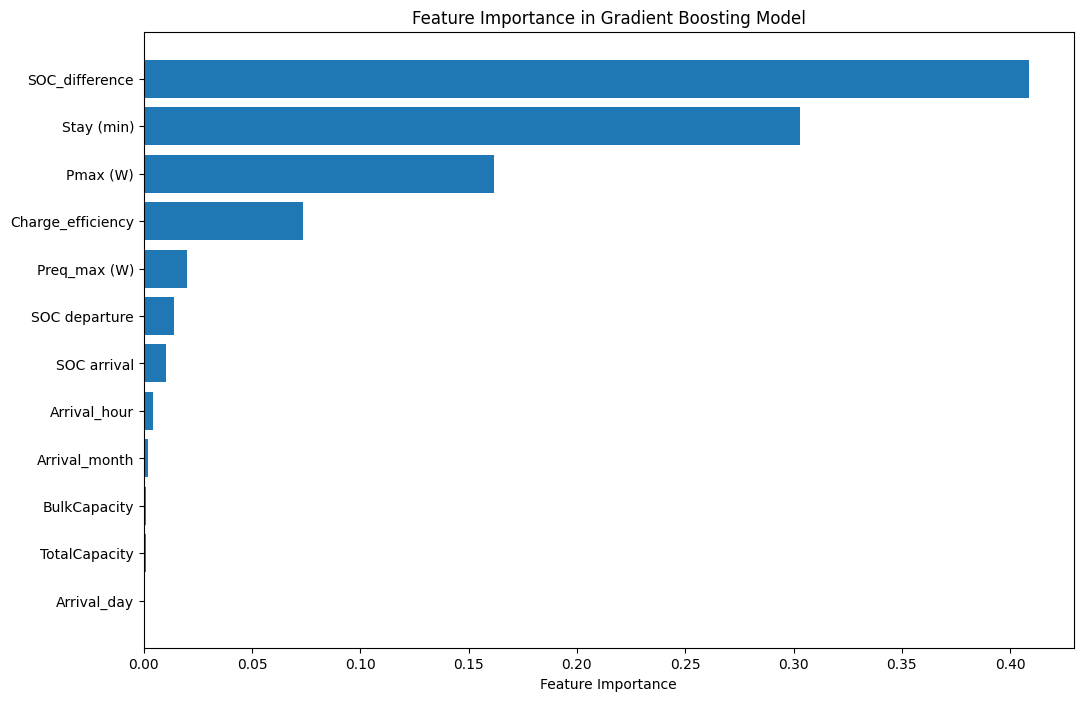

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load the dataset
file_path = '/content/Session_data.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Convert Arrival and Departure to datetime
data['Arrival'] = pd.to_datetime(data['Arrival'], format='%d-%m-%Y %H:%M')
data['Departure'] = pd.to_datetime(data['Departure'], format='%d-%m-%Y %H:%M')

# Calculate stay duration in minutes (if not provided correctly)
data['Stay (min)'] = (data['Departure'] - data['Arrival']).dt.total_seconds() / 60

# Calculate SOC difference
data['SOC_difference'] = data['SOC departure'] - data['SOC arrival']

# Extract time-based features
data['Arrival_hour'] = data['Arrival'].dt.hour
data['Arrival_day'] = data['Arrival'].dt.dayofweek
data['Arrival_month'] = data['Arrival'].dt.month

# Calculate charge efficiency
data['Charge_efficiency'] = data['Energy (Wh)'] / data['Stay (min)']

# Define features and target
features = ['Stay (min)', 'Pmax (W)', 'Preq_max (W)', 'SOC arrival', 'SOC departure',
            'TotalCapacity', 'BulkCapacity', 'Arrival_hour', 'Arrival_day', 'Arrival_month',
            'SOC_difference', 'Charge_efficiency']
target = 'Energy (Wh)'

# Split data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting model
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error: {rmse}')

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.show()

# Feature importance
importances = model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Model')
plt.show()


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Root Mean Squared Error after tuning: 3008.688017503295


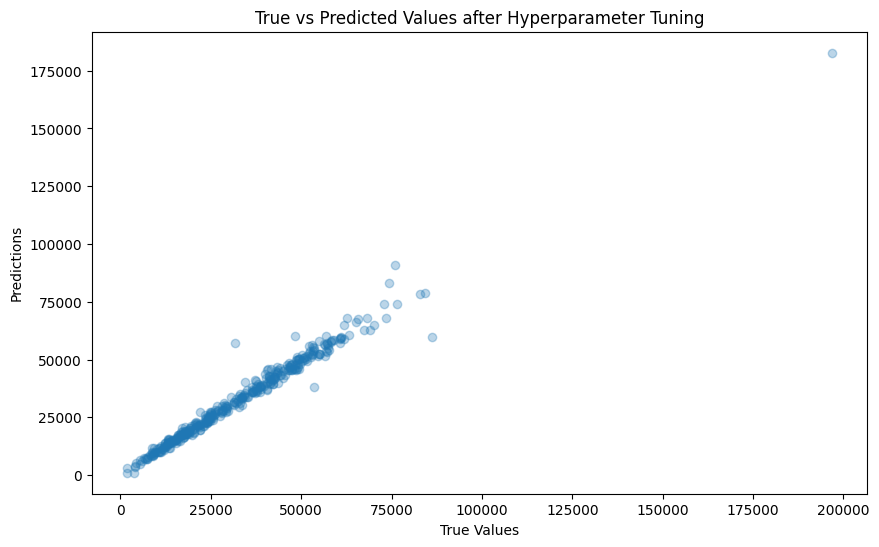

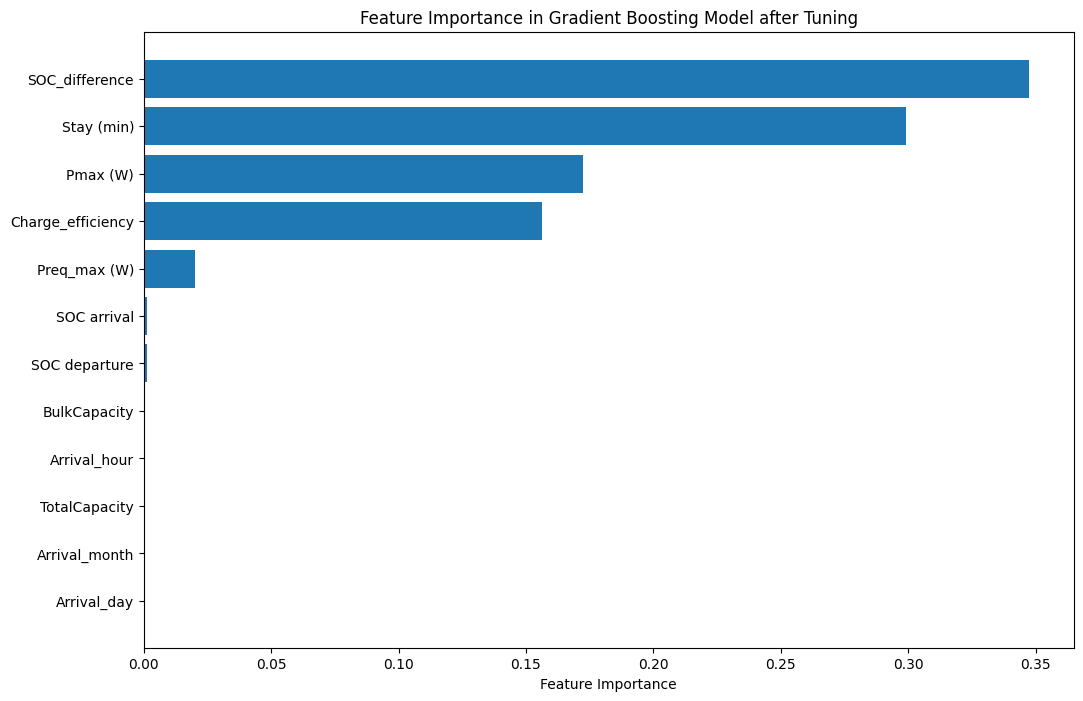

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = GradientBoostingRegressor(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print(f'Best Parameters: {best_params}')

# Make predictions and evaluate the best model
y_pred = best_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error after tuning: {rmse}')

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values after Hyperparameter Tuning')
plt.show()

# Feature importance of the best model
importances = best_model.feature_importances_
feature_names = X.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in Gradient Boosting Model after Tuning')
plt.show()


Root Mean Squared Error with XGBoost: 3768.009045933881


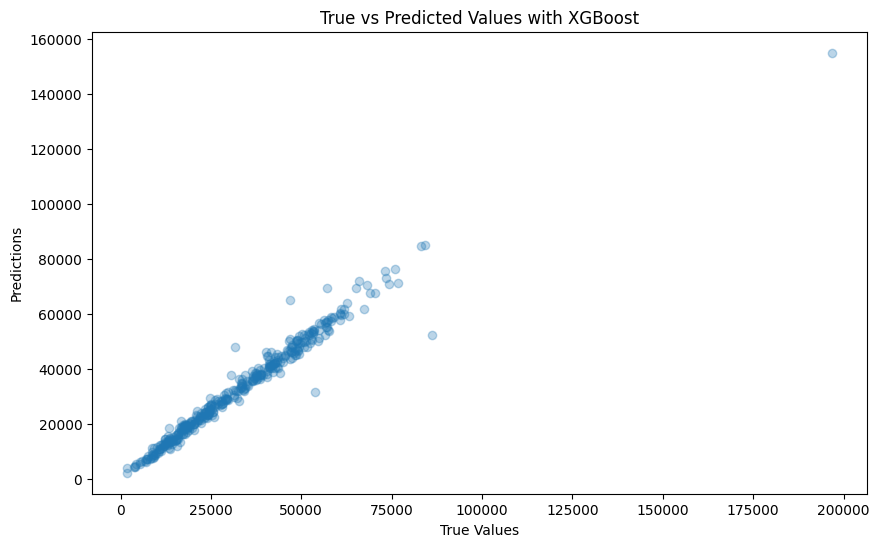

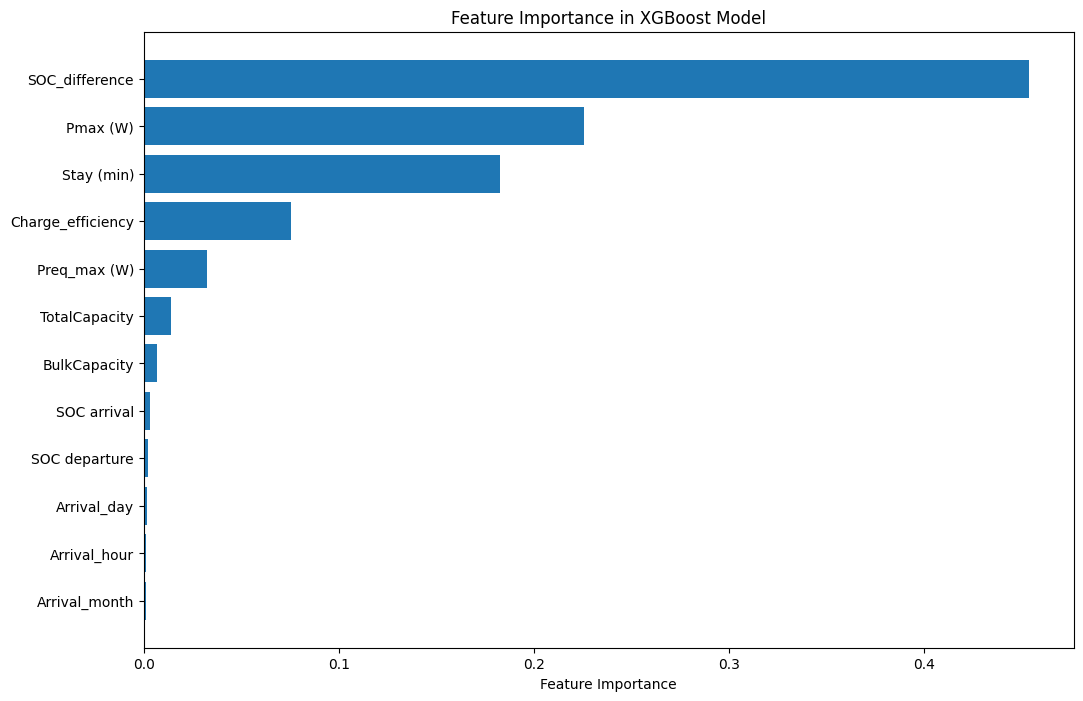

In [ ]:
from xgboost import XGBRegressor

# Initialize the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42, n_estimators=200, learning_rate=0.1, max_depth=5)

# Fit the model
xgb_model.fit(X_train, y_train)

# Make predictions and evaluate the model
y_pred = xgb_model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error with XGBoost: {rmse}')

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values with XGBoost')
plt.show()

# Feature importance of the XGBoost model
importances = xgb_model.feature_importances_
sorted_indices = importances.argsort()

plt.figure(figsize=(12, 8))
plt.barh(range(len(sorted_indices)), importances[sorted_indices], align='center')
plt.yticks(range(len(sorted_indices)), feature_names[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importance in XGBoost Model')
plt.show()


Epoch 1/500
121/121 [==============================] - 2s 7ms/step - loss: 1436764928.0000 - val_loss: 1250053888.0000
Epoch 2/500
121/121 [==============================] - 1s 6ms/step - loss: 1426347136.0000 - val_loss: 1227861120.0000
Epoch 3/500
121/121 [==============================] - 1s 8ms/step - loss: 1378533120.0000 - val_loss: 1154012416.0000
Epoch 4/500
121/121 [==============================] - 1s 5ms/step - loss: 1267617024.0000 - val_loss: 1018317120.0000
Epoch 5/500
121/121 [==============================] - 0s 3ms/step - loss: 1092049792.0000 - val_loss: 825005696.0000
Epoch 6/500
121/121 [==============================] - 0s 3ms/step - loss: 863789568.0000 - val_loss: 601606080.0000
Epoch 7/500
121/121 [==============================] - 0s 3ms/step - loss: 631956416.0000 - val_loss: 410070752.0000
Epoch 8/500
121/121 [==============================] - 0s 3ms/step - loss: 455580032.0000 - val_loss: 278187712.0000
Epoch 9/500
121/121 [==============================] - 

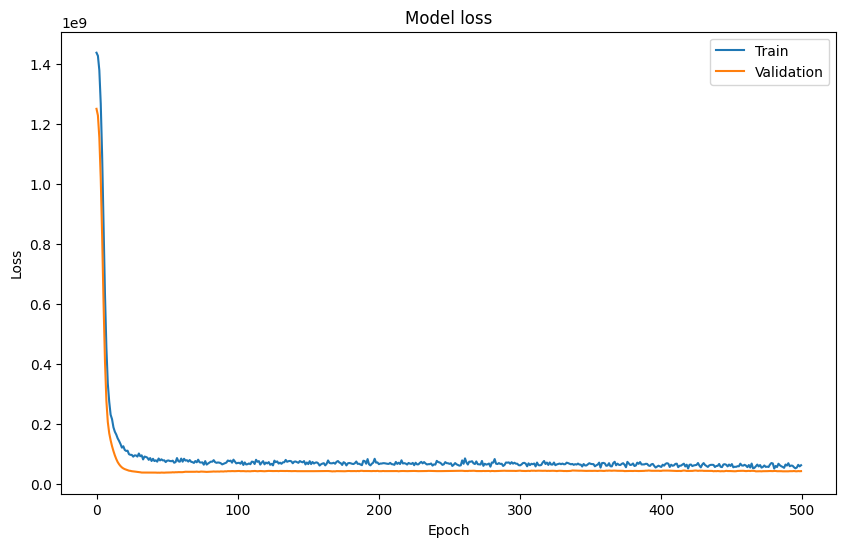

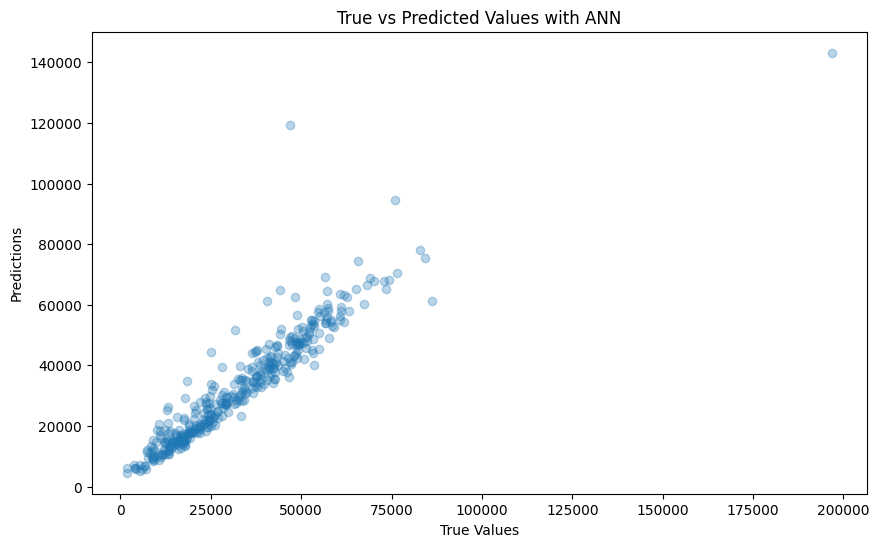

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/cleaned_ev_station_data.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Convert Arrival and Departure to datetime
data['Arrival'] = pd.to_datetime(data['Arrival'], format='%d-%m-%Y %H:%M')
data['Departure'] = pd.to_datetime(data['Departure'], format='%d-%m-%Y %H:%M')

# Calculate stay duration in minutes (if not provided correctly)
data['Stay (min)'] = (data['Departure'] - data['Arrival']).dt.total_seconds() / 60

# Calculate SOC difference
data['SOC_difference'] = data['SOC departure'] - data['SOC arrival']

# Extract time-based features
data['Arrival_hour'] = data['Arrival'].dt.hour
data['Arrival_day'] = data['Arrival'].dt.dayofweek
data['Arrival_month'] = data['Arrival'].dt.month

# Calculate charge efficiency
data['Charge_efficiency'] = data['Energy (Wh)'] / data['Stay (min)']

# Define features and target
features = ['Stay (min)', 'Pmax (W)', 'Preq_max (W)', 'SOC arrival', 'SOC departure',
            'TotalCapacity', 'BulkCapacity', 'Arrival_hour', 'Arrival_day', 'Arrival_month',
            'SOC_difference', 'Charge_efficiency']
target = 'Energy (Wh)'

# Split data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=500, batch_size=10, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error with ANN: {rmse}')

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot true vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values with ANN')
plt.show()


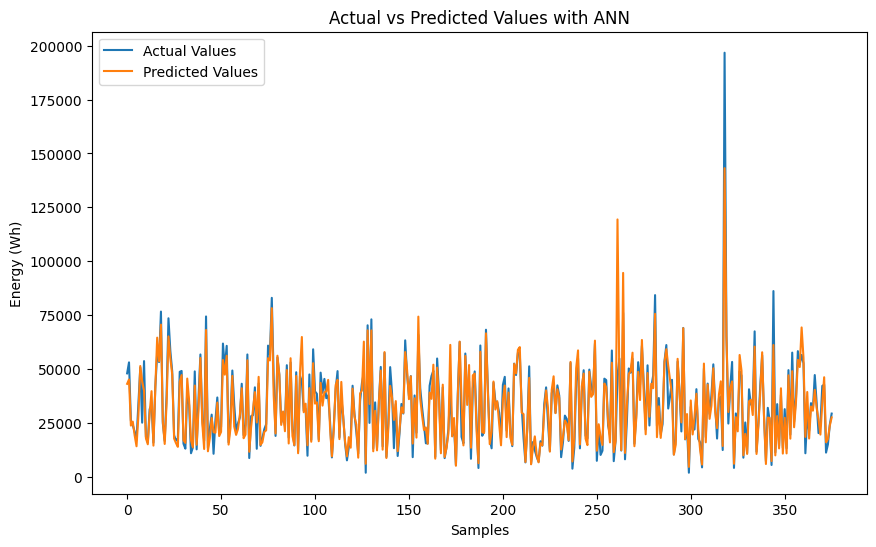

In [ ]:
# Plot actual vs predicted values for the ANN model
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Values')
plt.plot(y_pred, label='Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Energy (Wh)')
plt.title('Actual vs Predicted Values with ANN')
plt.legend()
plt.show()


Root Mean Squared Error with ARIMA: 22301.8667054237


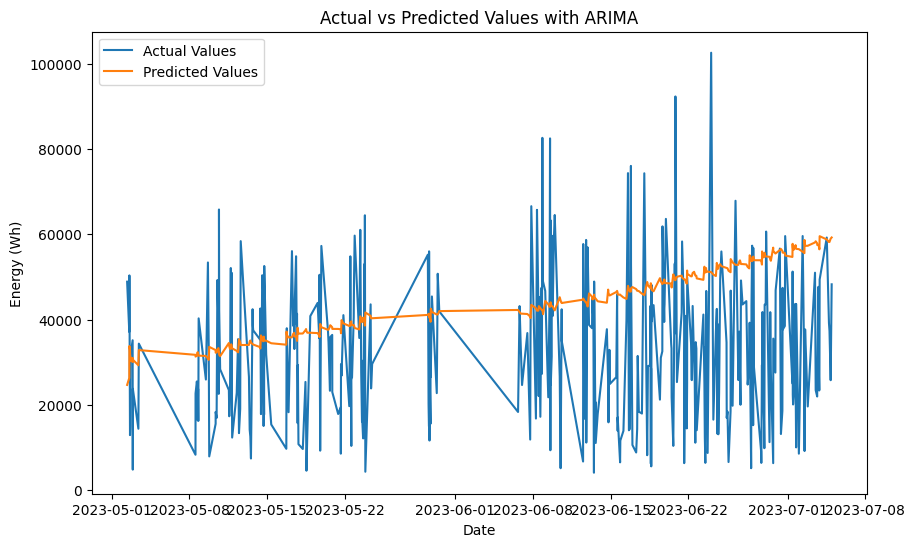

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings

warnings.filterwarnings("ignore")

# Load the cleaned dataset
file_path = '/content/cleaned_ev_station_data.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Ensure the data is sorted by time
data['Arrival'] = pd.to_datetime(data['Arrival'], format='%d-%m-%Y %H:%M')
data = data.sort_values(by='Arrival')

# Set the Arrival time as the index
data.set_index('Arrival', inplace=True)

# Define the target variable
target = 'Energy (Wh)'

# Split data into training and testing sets based on time
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Extract the target variable
y_train = train[target]
y_test = test[target]

# Fit the ARIMA model
model = SARIMAX(y_train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Make predictions
y_pred = results.predict(start=len(y_train), end=len(y_train) + len(y_test) - 1, dynamic=False)

# Calculate RMSE
rmse_arima = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error with ARIMA: {rmse_arima}')

# Plot actual vs predicted values for the ARIMA model
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual Values')
plt.plot(y_test.index, y_pred.values, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Energy (Wh)')
plt.title('Actual vs Predicted Values with ARIMA')
plt.legend()
plt.show()


In [ ]:
!pip install pmdarima


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 7.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pmdarima as pm

# Load the cleaned dataset
file_path = '/content/cleaned_ev_station_data.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Ensure the data is sorted by time
data['Arrival'] = pd.to_datetime(data['Arrival'], format='%d-%m-%Y %H:%M')
data = data.sort_values(by='Arrival')

# Set the Arrival time as the index
data.set_index('Arrival', inplace=True)

# Define the target variable
target = 'Energy (Wh)'

# Split data into training and testing sets based on time
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Extract the target variable
y_train = train[target]
y_test = test[target]


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# Find the best ARIMA model
auto_model = pm.auto_arima(y_train, seasonal=True, m=12, trace=True,
                           error_action='ignore', suppress_warnings=True, stepwise=True)

# Print the summary of the best model
print(auto_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=21.89 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=35037.820, Time=0.14 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=34591.073, Time=1.24 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=8.36 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=35035.822, Time=0.15 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=34590.428, Time=0.21 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=34591.064, Time=1.21 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=34593.072, Time=2.15 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=34380.527, Time=0.38 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=34381.903, Time=1.40 sec
 ARIMA(2,1,0)(0,0,1)[12] intercept   : AIC=34381.889, Time=1.55 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=34383.221, Time=11.13 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=34309.989, Time=0.28 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=34310.916, Time=1.21 sec
 ARIMA(3,1,0)(0

Root Mean Squared Error with ARIMA: 19413.32661657001


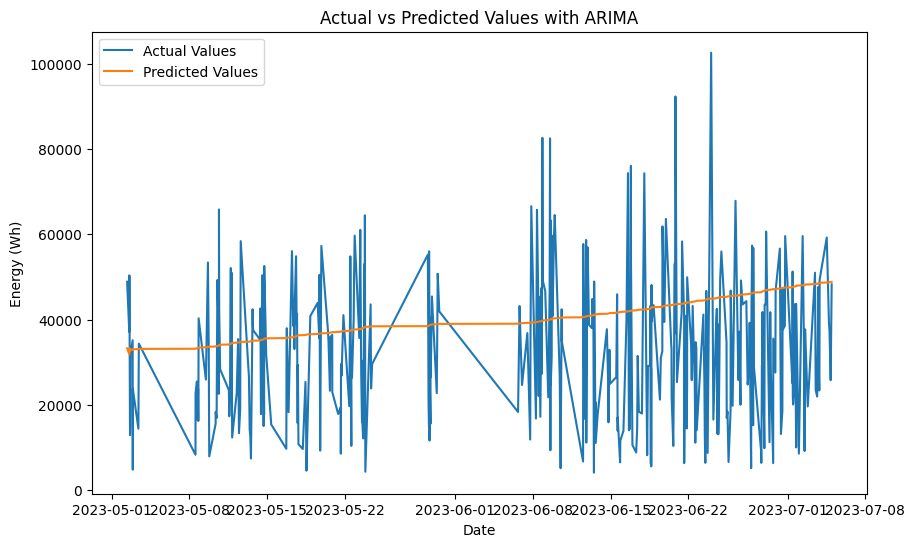

In [ ]:
# Fit the best ARIMA model
best_model = auto_model

# Make predictions
y_pred = best_model.predict(n_periods=len(y_test))

# Calculate RMSE
rmse_arima = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root Mean Squared Error with ARIMA: {rmse_arima}')

# Plot actual vs predicted values for the ARIMA model
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual Values')
plt.plot(y_test.index, y_pred, label='Predicted Values')
plt.xlabel('Date')
plt.ylabel('Energy (Wh)')
plt.title('Actual vs Predicted Values with ARIMA')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the cleaned dataset
file_path = '/content/cleaned_ev_station_data.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path)

# Ensure the data is sorted by time
data['Arrival'] = pd.to_datetime(data['Arrival'], format='%d-%m-%Y %H:%M')
data = data.sort_values(by='Arrival')

# Set the Arrival time as the index
data.set_index('Arrival', inplace=True)

# Define the target variable
target = 'Energy (Wh)'

# Normalize the data
scaler = MinMaxScaler()
data[target] = scaler.fit_transform(data[[target]])

# Split data into training and testing sets based on time
train_size = int(len(data) * 0.8)
train, test = data[:train_size], data[train_size:]

# Extract the target variable
y_train = train[target].values
y_test = test[target].values


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Reshape, Flatten, Dropout

# Generator model
def build_generator():
    model = Sequential()
    model.add(Dense(256, input_dim=100))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(BatchNormalization(momentum=0.8))
    model.add(Dense(1, activation='tanh'))
    return model

# Discriminator model
def build_discriminator():
    model = Sequential()
    model.add(Dense(512, input_dim=1))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Build and compile the discriminator
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build the generator
generator = build_generator()

# Build the GAN model by stacking the generator and discriminator
discriminator.trainable = False
gan_input = tf.keras.Input(shape=(100,))
generated_energy = generator(gan_input)
gan_output = discriminator(generated_energy)
gan = tf.keras.Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer='adam')


In [ ]:
# Training the GAN
def train_gan(epochs, batch_size):
    real = np.ones((batch_size, 1))
    fake = np.zeros((batch_size, 1))

    for epoch in range(epochs):
        idx = np.random.randint(0, y_train.shape[0], batch_size)
        real_energy = y_train[idx].reshape(-1, 1)

        noise = np.random.normal(0, 1, (batch_size, 100))
        generated_energy = generator.predict(noise)

        d_loss_real = discriminator.train_on_batch(real_energy, real)
        d_loss_fake = discriminator.train_on_batch(generated_energy, fake)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        noise = np.random.normal(0, 1, (batch_size, 100))
        g_loss = gan.train_on_batch(noise, real)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}/{epochs}, Discriminator Loss: {d_loss[0]}, Generator Loss: {g_loss}")

train_gan(epochs=5000, batch_size=32)


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 70ms/step
Epoch 100/5000, Discriminator Loss: 0.011109680403023958, Generator Loss: 7.802702903747559
1/1 [==============================] - 0s 24ms/step
Epoch 200/5000, Discriminator Loss: 0.1129086297005415, Generator Loss: 8.891043663024902
1/1 [==============================] - 0s 26ms/step
Epoch 300/5000, Discriminator Loss: 0.005161758926988114, Generator Loss: 12.85429859161377
1/1 [==============================] - 0s 33ms/step
Epoch 400/5000, Discriminator Loss: 0.01969350891886279, Generator Loss: 12.531610488891602
1/1 [==============================] - 0s 26ms/step
Epoch 500/5000, Discriminator Loss: 0.038724195561371744, Generator Loss: 10.680042266845703
1/1 [==============================] - 0s 24ms/step
Epoch 600/5000, Discriminator Loss: 0.08904930576682091, Generator Loss: 6.632763385772705
1/1 [==============================] - 0s 26ms/step
Epoch 700/5000, Discriminator Loss:

32/32 [==============================] - 0s 4ms/step


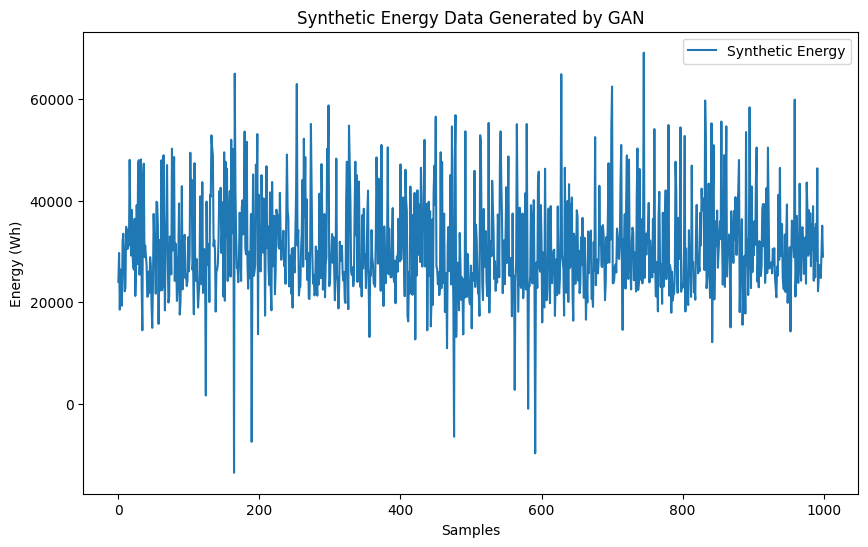

In [ ]:
# Generate synthetic data
noise = np.random.normal(0, 1, (1000, 100))
synthetic_energy = generator.predict(noise)
synthetic_energy = scaler.inverse_transform(synthetic_energy)

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.plot(synthetic_energy, label='Synthetic Energy')
plt.title('Synthetic Energy Data Generated by GAN')
plt.xlabel('Samples')
plt.ylabel('Energy (Wh)')
plt.legend()
plt.show()


Epoch 1/100
48/48 [==============================] - 10s 94ms/step - loss: 2628754688.0000 - val_loss: 3508466176.0000
Epoch 2/100
48/48 [==============================] - 4s 75ms/step - loss: 2600295424.0000 - val_loss: 3504838144.0000
Epoch 3/100
48/48 [==============================] - 5s 97ms/step - loss: 2599500032.0000 - val_loss: 3502886656.0000
Epoch 4/100
48/48 [==============================] - 5s 101ms/step - loss: 2604175360.0000 - val_loss: 3499760896.0000
Epoch 5/100
48/48 [==============================] - 4s 79ms/step - loss: 2581181184.0000 - val_loss: 3491035904.0000
Epoch 6/100
48/48 [==============================] - 4s 84ms/step - loss: 2597851648.0000 - val_loss: 3479662080.0000
Epoch 7/100
48/48 [==============================] - 5s 101ms/step - loss: 2577890560.0000 - val_loss: 3475576320.0000
Epoch 8/100
48/48 [==============================] - 4s 79ms/step - loss: 2589659136.0000 - val_loss: 3480776192.0000
Epoch 9/100
48/48 [==============================] - 

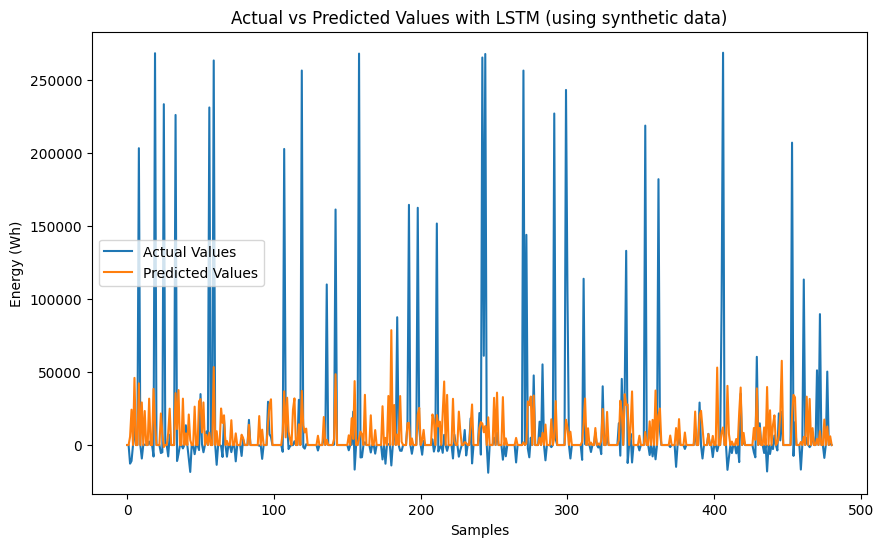

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Combine synthetic and real data
combined_energy = np.concatenate((y_train, synthetic_energy.flatten()))

# Create sequences for LSTM
sequence_length = 100
X_combined = np.array([combined_energy[i-sequence_length:i] for i in range(sequence_length, len(combined_energy))])
y_combined = combined_energy[sequence_length:]

# Train-test split
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, test_size=0.2, random_state=42)

# Reshape input for LSTM
X_train_combined = X_train_combined.reshape((X_train_combined.shape[0], X_train_combined.shape[1], 1))
X_test_combined = X_test_combined.reshape((X_test_combined.shape[0], X_test_combined.shape[1], 1))

# Build and train the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, activation='relu', input_shape=(X_train_combined.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

model_lstm.compile(optimizer='adam', loss='mean_squared_error')
history_lstm = model_lstm.fit(X_train_combined, y_train_combined, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Evaluate the LSTM model
y_pred_lstm = model_lstm.predict(X_test_combined)
rmse_lstm = mean_squared_error(y_test_combined, y_pred_lstm, squared=False)
print(f'Root Mean Squared Error with LSTM (using synthetic data): {rmse_lstm}')

# Plot actual vs predicted values for the LSTM model
plt.figure(figsize=(10, 6))
plt.plot(y_test_combined, label='Actual Values')
plt.plot(y_pred_lstm, label='Predicted Values')
plt.xlabel('Samples')
plt.ylabel('Energy (Wh)')
plt.title('Actual vs Predicted Values with LSTM (using synthetic data)')
plt.legend()
plt.show()
